### **Jobstreet Dataset**

In [51]:
import sys
sys.path.append('.')
from Helper.Function import update_salary, classify_job_level
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

In [27]:
df_jobstreet = pd.read_csv('./Dataset/Jobstreet/Jobstreet_combined_data.csv')
df_jobstreet.head()

,Job Title,Company Name,Location,Sector,Job Type,Salary,Job Responsibilities,URL Link
0,"Software Engineer, AI Model Training",Gear Inc.,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,"RM 5,000 – RM 7,000 per month",About the Opportunity: Gear Inc. is looking fo...,https://my.jobstreet.com/job/82375515?type=sta...
1,AI Engineer,DES DIGITAL MARKETING SDN. BHD.,"Subang Jaya, Selangor",Engineering - Software (Information & Communic...,Full time,"RM 5,000 – RM 7,500 per month",Key Responsibilities: • Conduct R&D to embed L...,https://my.jobstreet.com/job/82535599?type=sta...
2,AI Engineer AI工程师,Private Advertiser,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,"RM 10,000 – RM 15,000 per month",Job Responsibilities: 1. Conduct in-depth rese...,https://my.jobstreet.com/job/82411175?type=sta...
3,Machine Learning Engineer (Artificial Intellig...,FootfallCam,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,"RM 4,000 – RM 6,000 per month","We are seeking a highly motivated individual, ...",https://my.jobstreet.com/job/82197075?type=sta...
4,AI Engineer - Campus Hire 2025,Lenovo,"Petaling Jaya, Selangor",Engineering - Software (Information & Communic...,Full time,NaN,Responsibilities: Participate in the implement...,https://my.jobstreet.com/job/82614257?type=sta...


##### Drop column "URL Link" then check the duplicated rows.

In [28]:
df_jobstreet = df_jobstreet.drop(columns=['URL Link'], axis=1)
print("Shape: ", "\n", df_jobstreet.shape, "\n")
print("Duplicated rows: ", "\n", df_jobstreet.duplicated().sum(), "\n")
df_jobstreet = df_jobstreet.drop_duplicates()
print("Shape after dropped duplicated rows: ", "\n", df_jobstreet.shape, "\n")
df_jobstreet.to_csv('./Dataset/Jobstreet/Jobstreet_combined_data2.csv', index=False, encoding='utf-8-sig')
print("File saved as 'Jobstreet_combined_data2.csv' successfully!")

Shape:  
 (2400, 7) 

Duplicated rows:  
 1077 

Shape after dropped duplicated rows:  
 (1323, 7) 

File saved as 'Jobstreet_combined_data2.csv' successfully!


### New column "Position" was added and the new file as **"Updated_Jobstreet_data.csv"** will be used from **"Jobstreet_process.py"** script.

In [29]:
df_updated_j = pd.read_csv("./Dataset/Jobstreet/Updated_Jobstreet_data.csv")
df_updated_j.head()

,Job Title,Company Name,Location,Sector,Job Type,Salary,Job Responsibilities,Position
0,"Software Engineer, AI Model Training",Gear Inc.,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,"RM 5,000 – RM 7,000 per month",About the Opportunity: Gear Inc. is looking fo...,Software Developer
1,AI Engineer,DES DIGITAL MARKETING SDN. BHD.,"Subang Jaya, Selangor",Engineering - Software (Information & Communic...,Full time,"RM 5,000 – RM 7,500 per month",Key Responsibilities: • Conduct R&D to embed L...,AI Engineer
2,AI Engineer AI工程师,Private Advertiser,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,"RM 10,000 – RM 15,000 per month",Job Responsibilities: 1. Conduct in-depth rese...,AI Engineer
3,Machine Learning Engineer (Artificial Intellig...,FootfallCam,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,"RM 4,000 – RM 6,000 per month","We are seeking a highly motivated individual, ...",Machine Learning Engineer
4,AI Engineer - Campus Hire 2025,Lenovo,"Petaling Jaya, Selangor",Engineering - Software (Information & Communic...,Full time,NaN,Responsibilities: Participate in the implement...,AI Engineer


### Data Understanding

In [30]:
print("Shape: ", df_updated_j.shape, "\n")
print("Duplicated rows: ", df_updated_j.duplicated().sum(), "\n")
print("Total Number of Missing Value:", "\n", df_updated_j.isna().sum())

Shape:  (1323, 8) 

Duplicated rows:  0 

Total Number of Missing Value: 
 Job Title                 0
Company Name              0
Location                  0
Sector                    0
Job Type                  0
Salary                  945
Job Responsibilities      0
Position                  0
dtype: int64


In [31]:
print("Total number of Unique Value: ", "\n", df_updated_j.nunique(), "\n")
print("Unique value of Job type column: ", "\n", df_updated_j['Job Type'].unique())

Total number of Unique Value:  
 Job Title               1098
Company Name             732
Location                 119
Sector                   129
Job Type                   7
Salary                   165
Job Responsibilities    1314
Position                  10
dtype: int64 

Unique value of Job type column:  
 ['Full time' 'Contract/Temp' 'Part time' 'Full time, Part time'
 'Casual/Vacation, Part time' 'Casual/Vacation' 'Contract/Temp, Full time']


### Data preprocessing and Feature Engineering
- Column "Salary" take the average value of the range.
- Column "State" extract the state from the column "Lacotion" and remove any space ' ' in the data.
- Column "Field" extract the field from the column "Sector".
- Column "Level" use the exact match from the column "Job Title".

In [32]:
df_updated_j['Salary'] = df_updated_j['Salary'].apply(lambda x: update_salary(x) if pd.notna(x) else None)
df_updated_j['State'] = df_updated_j['Location'].apply(lambda x:x.split(",")[-1] if isinstance(x, str) else None)
df_updated_j['State'] = df_updated_j['State'].str.strip()
df_updated_j['Field'] = df_updated_j['Sector'].apply(lambda x:x.split('(')[-1].split(')')[0] if isinstance(x, str) else None)
df_updated_j['Level'] = df_updated_j['Job Title'].apply(classify_job_level)

def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text
df_updated_j['Cleaned_Responsibilities'] = df_updated_j['Job Responsibilities'].apply(clean_text)
df_updated_j.head()


,Job Title,Company Name,Location,Sector,Job Type,Salary,Job Responsibilities,Position,State,Field,Level,Cleaned_Responsibilities
0,"Software Engineer, AI Model Training",Gear Inc.,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,6000.0,About the Opportunity: Gear Inc. is looking fo...,Software Developer,Kuala Lumpur,Information & Communication Technology,Junior,about the opportunity gear inc is looking for ...
1,AI Engineer,DES DIGITAL MARKETING SDN. BHD.,"Subang Jaya, Selangor",Engineering - Software (Information & Communic...,Full time,6250.0,Key Responsibilities: • Conduct R&D to embed L...,AI Engineer,Selangor,Information & Communication Technology,Junior,key responsibilities conduct rd to embed llms ...
2,AI Engineer AI工程师,Private Advertiser,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,12500.0,Job Responsibilities: 1. Conduct in-depth rese...,AI Engineer,Kuala Lumpur,Information & Communication Technology,Junior,job responsibilities conduct indepth research ...
3,Machine Learning Engineer (Artificial Intellig...,FootfallCam,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,5000.0,"We are seeking a highly motivated individual, ...",Machine Learning Engineer,Kuala Lumpur,Information & Communication Technology,Junior,we are seeking a highly motivated individual t...
4,AI Engineer - Campus Hire 2025,Lenovo,"Petaling Jaya, Selangor",Engineering - Software (Information & Communic...,Full time,None,Responsibilities: Participate in the implement...,AI Engineer,Selangor,Information & Communication Technology,Junior,responsibilities participate in the implementa...


In [33]:
print("Total number of Each of the Unique Level for column 'Level': ", "\n", df_updated_j['Level'].value_counts(), "\n")
print("Total number of Each of the Position Unique Class: ", "\n", df_updated_j['Position'].value_counts())

Total number of Each of the Unique Level for column 'Level':  
 Level
Junior            1014
Senior             154
Manager             60
Intern              52
Lead                32
Head                 7
Vice President       2
Director             2
Name: count, dtype: int64 

Total number of Each of the Position Unique Class:  
 Position
Others                           567
Business Analyst                 196
Software Developer               124
Data Analyst                     120
Data Engineer                     95
Data Operation                    62
Data Scientist                    62
AI Engineer                       56
Business Intelligence Analyst     30
Machine Learning Engineer         11
Name: count, dtype: int64


##### Check again the Total number of Unique value of each varaiable after Data preprocessing and Feature Engineering

In [34]:
print("Total Number of Unique value after Data preprocessing and Feature Engineering: ", "\n", df_updated_j.nunique())

Total Number of Unique value after Data preprocessing and Feature Engineering:  
 Job Title                   1098
Company Name                 732
Location                     119
Sector                       129
Job Type                       7
Salary                       127
Job Responsibilities        1314
Position                      10
State                         15
Field                         26
Level                          8
Cleaned_Responsibilities    1314
dtype: int64


##### Check the Unique value of columns "Field" and "Salary"

In [35]:
print("Unique value of 'Field': ", '\n', df_updated_j['Field'].unique(), '\n')
print("Unique value of 'State': ", '\n', df_updated_j['State'].unique(), '\n')

Unique value of 'Field':  
 ['Information & Communication Technology' 'Engineering'
 'Science & Technology' 'Sales' 'Call Centre & Customer Service'
 'Banking & Financial Services' 'Education & Training'
 'Marketing & Communications' 'Hospitality & Tourism'
 'Administration & Office Support' 'Manufacturing, Transport & Logistics'
 'Consulting & Strategy' 'Government & Defence'
 'Insurance & Superannuation' 'Accounting' 'Healthcare & Medical'
 'Trades & Services' 'Legal' 'Design & Architecture'
 'Human Resources & Recruitment' 'Construction'
 'Mining, Resources & Energy' 'Retail & Consumer Products'
 'Advertising, Arts & Media' 'CEO & General Management'
 'Real Estate & Property'] 

Unique value of 'State':  
 ['Kuala Lumpur' 'Selangor' 'Penang' 'Kedah' 'Johor' 'Sarawak' 'Melaka'
 'Sabah' 'Perak' 'Negeri Sembilan' 'Malaysia' 'Pahang' 'Labuan'
 'Terengganu' 'Putrajaya'] 



##### Check column "Salary"
- Contain some "string" data inside, remove it.

In [36]:
# Count the Total number of valid Salary and Invalid Salary
float_count = df_updated_j['Salary'].apply(lambda x: isinstance(x, float)).sum()
print("Total Number of float count: ", float_count, "\n")

non_float_values = df_updated_j['Salary'][~df_updated_j['Salary'].apply(lambda x: isinstance(x, float)) & df_updated_j['Salary'].notna()]
print("Unique of Non Float Values: ", "\n", non_float_values.unique(), "\n")
print("Total Number of non_float_values: ", len(non_float_values))

df_updated_j['Salary'] = df_updated_j['Salary'].apply(lambda x: x if isinstance(x, float) else float('nan'))
print("Column 'Salary' drop the Invalid salary Value successfully!")

Total Number of float count:  367 

Unique of Non Float Values:  
 ['$7000.0 - $10000.0 p.m. + 9000'
 'Wellness Allowance and Medical Insurance'
 'Competitive salary and benefits package'
 'TransportDentalOpticalMeal Allowance' 'Negotiable' 'Salary plus bonus'
 'Competitive Rewards'] 

Total Number of non_float_values:  11
Column 'Salary' drop the Invalid salary Value successfully!


### KNN Imputation
- KNN imputation was implemented in column "Salary" with n = 3.
- Selected columns are "Salary", "Job Type", "Position", "State", "Field", "Level".
- One-Hot-Encoding for columns "Job Type", "Position", "State", "Field".
- Data Mapping for column "Level".

In [37]:
# KNN Imputation for "Salary" column
imputation_columns = ["Salary", "Job Type", "Position", "State", "Field", "Level"]
salary_imputation = df_updated_j[imputation_columns].copy()

level_mapping = {
    'Intern': 0,
    'Junior': 1,
    'Senior': 2,
    'Lead': 3,
    'Manager': 4,
    'Head': 5,
    'Director': 6,
    'Vice President': 7
}
salary_imputation['Level'] = salary_imputation['Level'].map(level_mapping)

encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_columns = encoder.fit_transform(salary_imputation[["Job Type", "Position", "State", "Field"]])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(["Job Type", "Position", "State", "Field"]))
salary_imputation = pd.concat([salary_imputation.drop(["Job Type", "Position", "State", "Field"], axis=1), encoded_df], axis=1)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=3)
salary_imputed = pd.DataFrame(knn_imputer.fit_transform(salary_imputation), columns=salary_imputation.columns)

# Convert the imputed 'Level' column back to categorical labels
inverse_level_mapping = {v: k for k, v in level_mapping.items()}
salary_imputed['Level'] = salary_imputed['Level'].apply(lambda x: inverse_level_mapping.get(round(x), 'Unknown'))
print(salary_imputed.head(), "\n")
print("Total Number of Missing Value in Column 'Salary': ", salary_imputed['Salary'].isna().sum(), "\n")

df_updated_j['Salary'] = salary_imputed['Salary'].round(0).astype(int)
print("KNN Imputation for 'Salary' column completed successfully!")

    Salary   Level  Job Type_Casual/Vacation, Part time  \
0   6000.0  Junior                                  0.0   
1   6250.0  Junior                                  0.0   
2  12500.0  Junior                                  0.0   
3   5000.0  Junior                                  0.0   
4   5805.5  Junior                                  0.0   

   Job Type_Contract/Temp  Job Type_Contract/Temp, Full time  \
0                     0.0                                0.0   
1                     0.0                                0.0   
2                     0.0                                0.0   
3                     0.0                                0.0   
4                     0.0                                0.0   

   Job Type_Full time  Job Type_Full time, Part time  Job Type_Part time  \
0                 1.0                            0.0                 0.0   
1                 1.0                            0.0                 0.0   
2                 1.0           

### Embeddings for column "Cleaned_Responsibilities" and create a new column "Embeddings cleaned responsibilities".

In [38]:
# Embedding the Jobstreet Data columns "Cleaned Responsibilities" using Sentence Transformers
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute embeddings
responsibilities = df_updated_j['Cleaned_Responsibilities'].tolist()
embeddings = model.encode(responsibilities, show_progress_bar=True)

df_updated_j['Embeddings cleaned responsibilities'] = list(embeddings)
print("Embeddings for cleaned responsibilities successfully added to the dataframe!")

Batches: 100%|██████████| 42/42 [00:23<00:00,  1.76it/s]

Embeddings for cleaned responsibilities successfully added to the dataframe!


In [39]:
df_updated_j.to_pickle("./Dataset/Jobstreet/Jobstreet_after_embeddings.pkl")
print("File saved as 'pickle' format successfully!")
df_updated_j.head()

File saved as 'pickle' format successfully!


,Job Title,Company Name,Location,Sector,Job Type,Salary,Job Responsibilities,Position,State,Field,Level,Cleaned_Responsibilities,Embeddings cleaned responsibilities
0,"Software Engineer, AI Model Training",Gear Inc.,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,6000,About the Opportunity: Gear Inc. is looking fo...,Software Developer,Kuala Lumpur,Information & Communication Technology,Junior,about the opportunity gear inc is looking for ...,"[-0.097922675, -0.00730191, 0.0762605, 0.03808..."
1,AI Engineer,DES DIGITAL MARKETING SDN. BHD.,"Subang Jaya, Selangor",Engineering - Software (Information & Communic...,Full time,6250,Key Responsibilities: • Conduct R&D to embed L...,AI Engineer,Selangor,Information & Communication Technology,Junior,key responsibilities conduct rd to embed llms ...,"[-0.031989988, -0.020431532, -0.0135324085, -0..."
2,AI Engineer AI工程师,Private Advertiser,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,12500,Job Responsibilities: 1. Conduct in-depth rese...,AI Engineer,Kuala Lumpur,Information & Communication Technology,Junior,job responsibilities conduct indepth research ...,"[-0.07243539, -0.0042510843, 0.020940952, 0.01..."
3,Machine Learning Engineer (Artificial Intellig...,FootfallCam,Kuala Lumpur,Engineering - Software (Information & Communic...,Full time,5000,"We are seeking a highly motivated individual, ...",Machine Learning Engineer,Kuala Lumpur,Information & Communication Technology,Junior,we are seeking a highly motivated individual t...,"[-0.10513033, -0.07652826, 0.001918618, 0.0112..."
4,AI Engineer - Campus Hire 2025,Lenovo,"Petaling Jaya, Selangor",Engineering - Software (Information & Communic...,Full time,5806,Responsibilities: Participate in the implement...,AI Engineer,Selangor,Information & Communication Technology,Junior,responsibilities participate in the implementa...,"[-0.022935899, -0.004758113, 0.025300728, -0.0..."


### Data Visualization

##### Univariate Analysis
- **Bar Chart** and **Pie Chart** for each of the categorical variables.
- **Histogram** for variable "Salary".

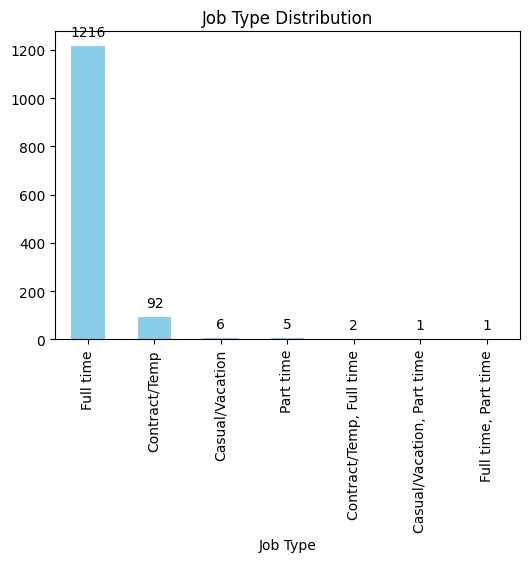

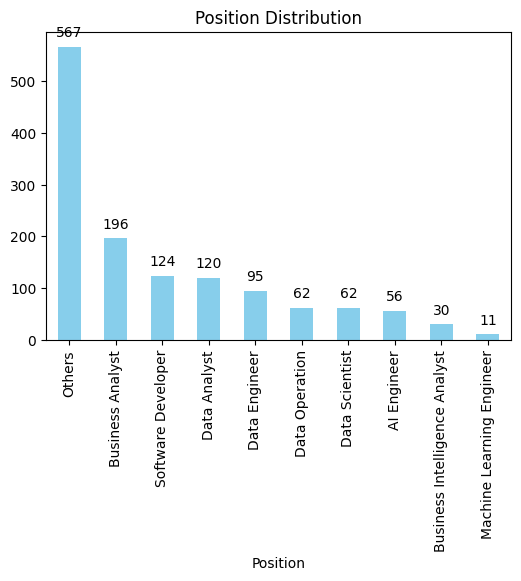

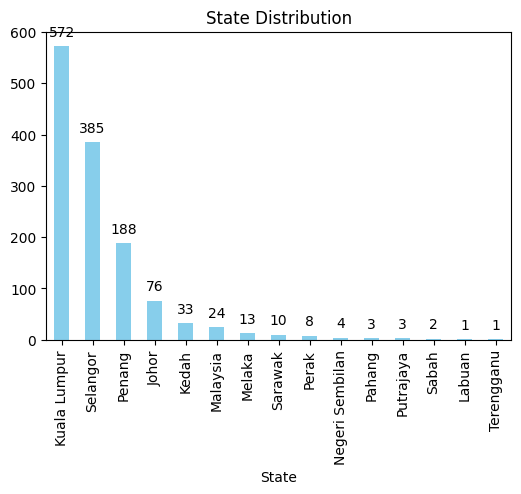

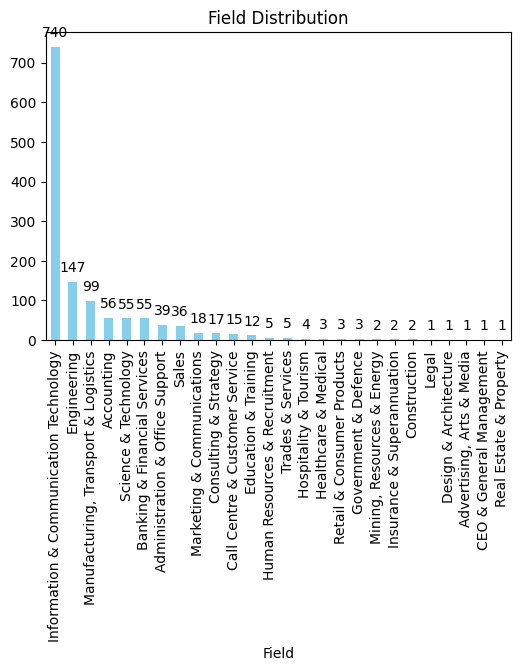

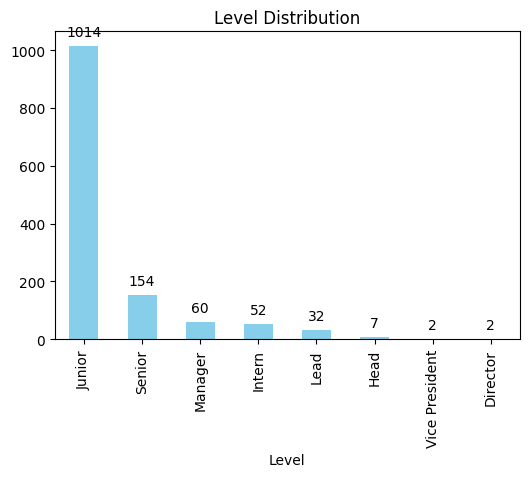

In [53]:
def plot_categorical_bar_charts(df, columns):
    for column in columns:
        plt.figure(figsize=(6, 4))
        ax = df[column].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'{column} Distribution')

        # Adding labels inside the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=10, color='black', fontweight='normal', 
                        xytext=(0, 10), textcoords='offset points')
            
        plt.show()
plot_categorical_bar_charts(df_updated_j, ['Job Type', 'Position', 'State', 'Field', 'Level'])

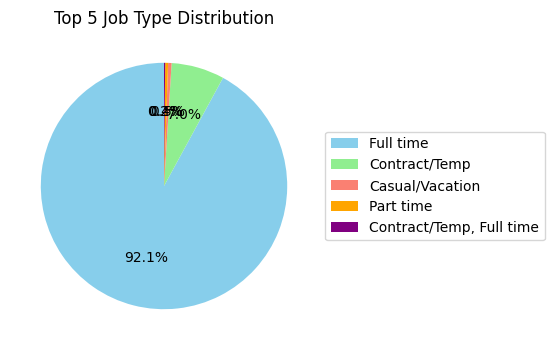

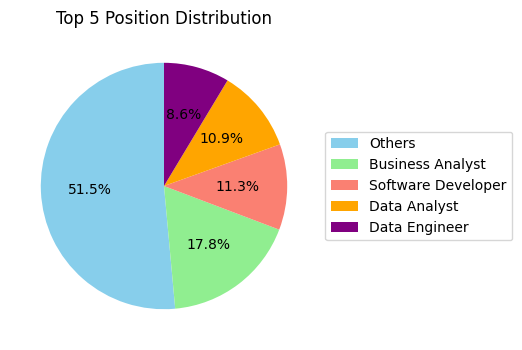

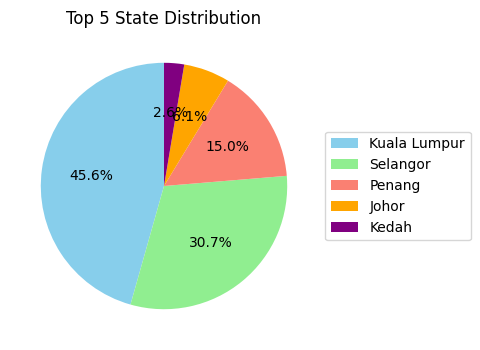

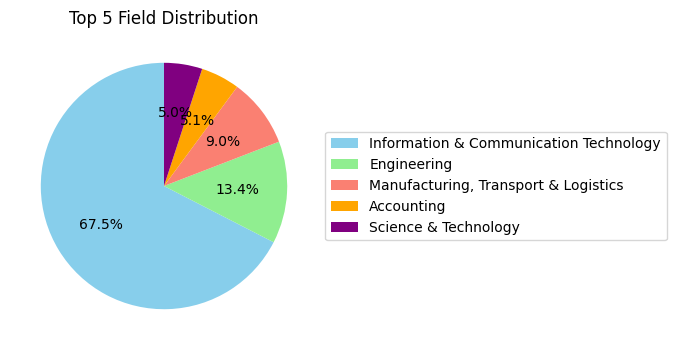

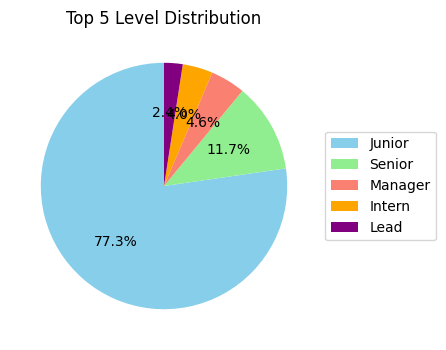

In [54]:
def plot_categorical_pie_charts(df, columns):
    for column in columns:
        plt.figure(figsize=(4, 4))
        top5 = df[column].value_counts().head(5)
        ax = top5.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'], 
                       legend=False, labels=None)
        plt.title(f'Top 5 {column} Distribution')
        plt.ylabel('')  
        ax.legend(top5.index, loc='center left', bbox_to_anchor=(1, 0.5)) 
        plt.show()
Pie_chart = plot_categorical_pie_charts(df_updated_j, ['Job Type', 'Position', 'State', 'Field', 'Level'])
Pie_chart

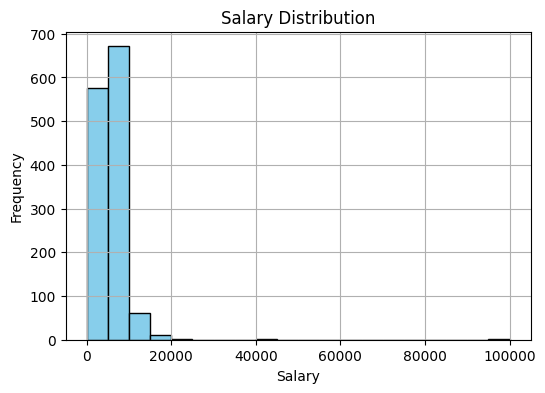

In [55]:
plt.figure(figsize=(6, 4))
df_updated_j["Salary"].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Multi-Variable Analysis
- **Group Bar Chart** for categorical variables with variable "Salary".

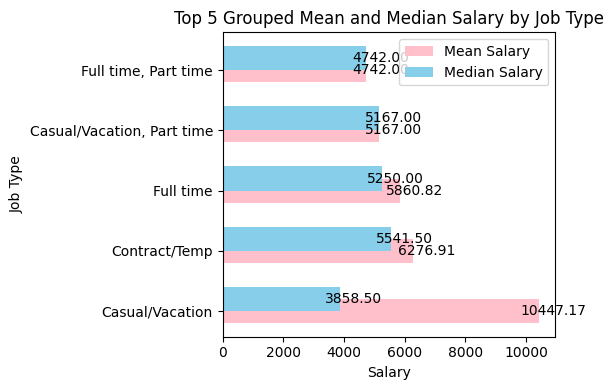

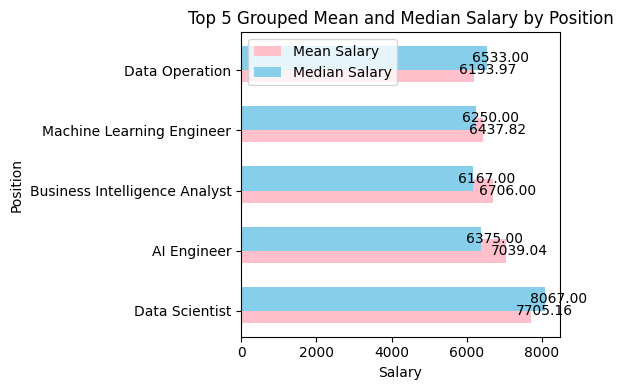

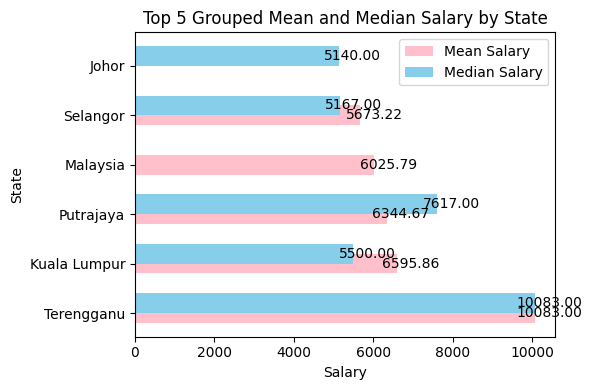

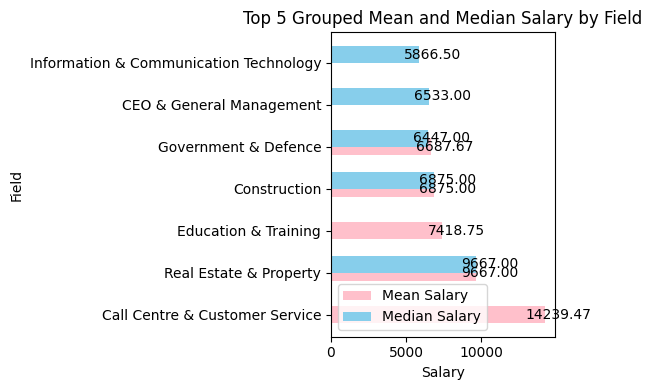

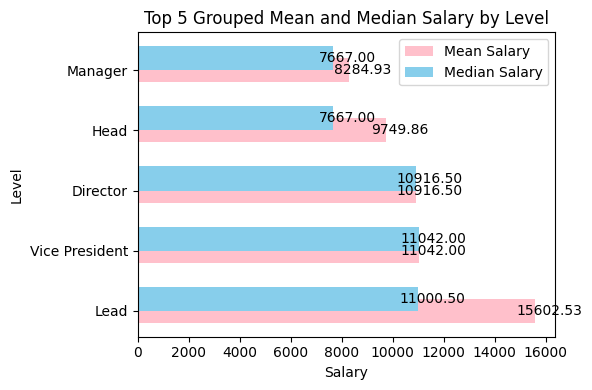

In [56]:
def plot_grouped_bars_horizontal_distinct(df, columns):
    for column in columns:
        mean_salary = df.groupby(column)["Salary"].mean().reset_index()
        median_salary = df.groupby(column)["Salary"].median().reset_index()
        mean_salary = mean_salary.sort_values(by="Salary", ascending=False).head(5)
        median_salary = median_salary.sort_values(by="Salary", ascending=False).head(5)

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.barh(mean_salary[column], mean_salary["Salary"], color='pink', label='Mean Salary', height=0.4, align='center')

        ax.barh(median_salary[column], median_salary["Salary"], color='skyblue', label='Median Salary', height=0.4, align='edge')
        plt.title(f'Top 5 Grouped Mean and Median Salary by {column}')
        plt.xlabel('Salary')
        plt.ylabel(column)

        # Add labels inside the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_width():.2f}', 
                        (p.get_width(), p.get_y() + p.get_height() / 2.), 
                        ha='center', va='center', 
                        fontsize=10, color='black', fontweight='normal', 
                        xytext=(10, 0), textcoords='offset points')

        plt.legend()
        plt.tight_layout()
        plt.show()

plot_grouped_bars_horizontal_distinct(df_updated_j, ['Job Type', 'Position', 'State', 'Field', 'Level'])


In [44]:
df_updated_j.to_csv('./Dataset/Jobstreet/Reference.csv', index=False, encoding='utf-8-sig')